<a href="https://colab.research.google.com/github/rudolfbob/ADL/blob/main/rudolfbobmartua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UAS ADL**
Nama : Rudolf Bob Martua B
NPM : 2106661560
**Topik : Deep Adversarial Training for Multi-Organ Nuclei Segmentation in Histopathology Images**

In [ ]:
!git clone https://github.com/gabriellaaileen/NucleiSegmentation.git

In [ ]:
%cd /content/NucleiSegmentation

In [ ]:
!pip install dominate
!pip install scipy==1.1.0
!pip install pytorch torchvision cudatoolkit==10.1 
!pip install visdom

In [ ]:
%cd https://paperswithcode.com/dataset/imagenet

In [ ]:
python download.py -c bedroom

# **Delete semua file dengan format .pyc**

In [ ]:
list_pyc=["/content/NucleiSegmentation/options","/content/NucleiSegmentation/util"]

In [ ]:
import os

**Training New Model**

Data yang digunakan merupakan data sel kanker payudara yang diakses melalui Kaggle. Dataset berisi gambar dan label, yaitu untuk train masing-masing berjumlah 24 dan untuk test masing-masing berjumlah 8.

Tahap preprocessing yang dilakukan adalah melakukan croping gambar dan label serta me-resize ukurannya menjadi . Selanjutnya dilakukan pairing gambar dan label, sehingga ukurannya menjadi .

Sebagai gambaran berikut adalah contoh data yang digunakan

Data yang digunakan dalam proses reproduce ini adalah gambar sel darah merah berukuran 256x256. Gambar ini kemudian disejajarkan dengan labelnya berupa anotasi/segmentasi sel berukuran 256x256. Sehingga, data training yang digunakan berukuran 512x256.

#**Generate synthetic images**
* train data: **image_1_train** until **image_10_train**
* test data: **image_11_train** until **image_13_train**
* number of epoch: 400


to train cycleGAN model to generate synthetic red blood cell data, use --model "cycle_gan"




cycleGAN **training**

In [ ]:
!python train.py --dataroot "/content/NucleiSegmentation/dataset" --name NU_SEG  --gpu_ids 0 --display_id 0 --niter 200 --niter_decay 200 --pool_size 64 --loadSize 256 --fineSize 256 --model "cycle_gan"


**Output at epoch 400**

epoch400_rec_A and epoch400_rec_B are synthetic images
 
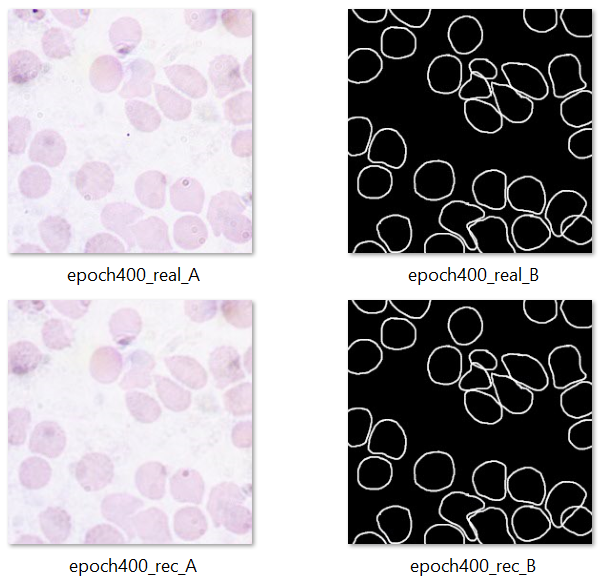

**cycleGAN testing**

In [ ]:
!python test.py --dataroot "/content/NucleiSegmentation/datasets/Nuclei_Segmentation" --name NU_SEG  --gpu_ids 0 --display_id 0  --loadSize 256 --fineSize 256 --model "cycle_gan"  --checkpoints_dir /content/NucleiSegmentation/checkpoints

**synthetic images from test image: image_11_train**

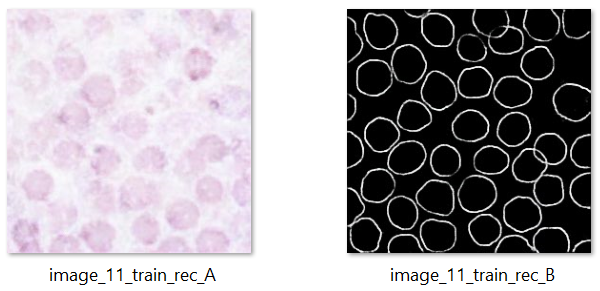

#**Image segmentation**

**pix2pix training**

In [ ]:
!python train.py --dataroot "/content/NucleiSegmentation/datasets/Nuclei_Segmentation" --name NU_SEG  --gpu_ids 0 --display_id 0 --niter 200 --niter_decay 200 --pool_size 64 --loadSize 256 --fineSize 256 --model "pix2pix"

**Image segmentation output at epoch 400**

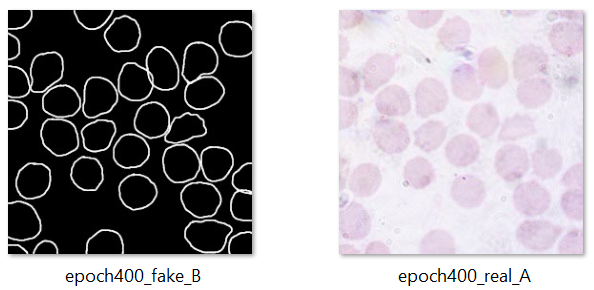

**pix2pix testing**

In [ ]:
!python test.py --dataroot /content/NucleiSegmentation/datasets/Segmentation_Test --name NU_SEG --gpu_ids 0 --display_id 0 --loadSize 256 --fineSize 256

**Test image segmentation results**

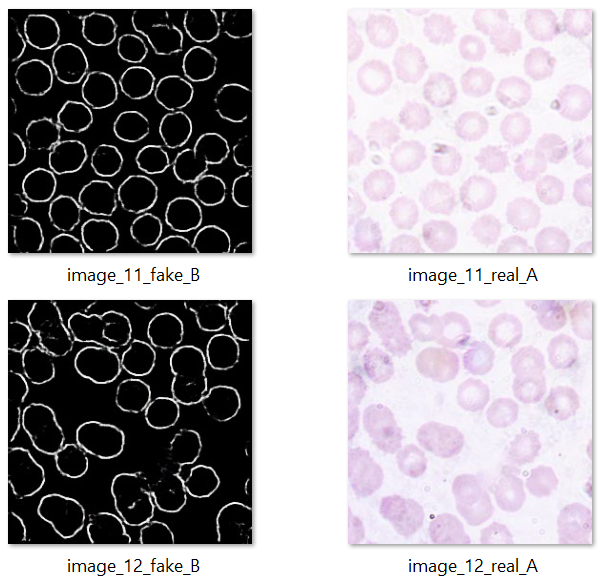